In [1]:
import ktrain
from ktrain import text

## Load data

In [2]:
trn, val, preproc = text.texts_from_folder("/home/jupyter-ozkan_ma/data/TXT/Ablation_Study_02/", 
                                           max_features=20000, maxlen=512, 
                                           ngram_range=1, 
                                           preprocess_mode='standard',
                                           classes=['Center', 'Left', 'Right'])

detected encoding: utf-8
language: en
Word Counts: 166125
Nrows: 60000
60000 train sequences
train sequence lengths:
	mean : 256
	95percentile : 490
	99percentile : 523
x_train shape: (60000,512)
y_train shape: (60000, 3)
Is Multi-Label? False
15000 test sequences
test sequence lengths:
	mean : 259
	95percentile : 490
	99percentile : 522
x_test shape: (15000,512)
y_test shape: (15000, 3)


## Inspection of available models

In [3]:
text.print_text_classifiers()

fasttext: a fastText-like model [http://arxiv.org/pdf/1607.01759.pdf]
logreg: logistic regression using a trainable Embedding layer
nbsvm: NBSVM model [http://www.aclweb.org/anthology/P12-2018]
bigru: Bidirectional GRU with pretrained fasttext word vectors [https://fasttext.cc/docs/en/crawl-vectors.html]
standard_gru: simple 2-layer GRU with randomly initialized embeddings
bert: Bidirectional Encoder Representations from Transformers (BERT) [https://arxiv.org/abs/1810.04805]
distilbert: distilled, smaller, and faster BERT from Hugging Face [https://arxiv.org/abs/1910.01108]


## Apply the bigru model

In [4]:
bigru = text.text_classifier("bigru", trn, preproc=preproc)

Is Multi-Label? False
compiling word ID features...
maxlen is 512
word vectors will be loaded from: https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.en.300.vec.gz
processing pretrained word vectors...
loading pretrained word vectors...this may take a few moments...


done.


In [5]:
learner_bigru = ktrain.get_learner(bigru, train_data=trn, val_data=val)

simulating training for different learning rates... this may take a few moments...
Epoch 1/5
1875/1875 [==============================] - 87s 47ms/step - loss: 1.0992 - accuracy: 0.3514
Epoch 2/5
1875/1875 [==============================] - 87s 46ms/step - loss: 1.0435 - accuracy: 0.4742
Epoch 3/5
1875/1875 [==============================] - 88s 47ms/step - loss: 0.5883 - accuracy: 0.7578
Epoch 4/5
1875/1875 [==============================] - 88s 47ms/step - loss: nan - accuracy: 0.4426
Epoch 5/5
1875/1875 [==============================] - 90s 48ms/step - loss: nan - accuracy: 0.3333


done.
Visually inspect loss plot and select learning rate associated with falling loss


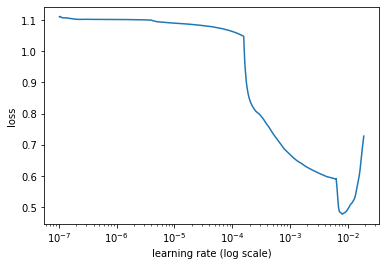

In [6]:
learner_bigru.lr_find(show_plot=True, max_epochs=5)

In [7]:
learner_bigru.lr_estimate()

(0.00014971066, 0.0018998511135578156)

In [8]:
learner_bigru.fit(learner_bigru.lr_estimate()[1], 5)

Epoch 1/5
1875/1875 [==============================] - 100s 53ms/step - loss: 0.5224 - accuracy: 0.7837 - val_loss: 0.3893 - val_accuracy: 0.8489
Epoch 2/5
1875/1875 [==============================] - 97s 52ms/step - loss: 0.2755 - accuracy: 0.8982 - val_loss: 0.3648 - val_accuracy: 0.8647
Epoch 3/5
1875/1875 [==============================] - 98s 52ms/step - loss: 0.1340 - accuracy: 0.9538 - val_loss: 0.4379 - val_accuracy: 0.8606
Epoch 4/5
1875/1875 [==============================] - 93s 50ms/step - loss: 0.0616 - accuracy: 0.9805 - val_loss: 0.5230 - val_accuracy: 0.8621
Epoch 5/5
1875/1875 [==============================] - 92s 49ms/step - loss: 0.0376 - accuracy: 0.9883 - val_loss: 0.6573 - val_accuracy: 0.8539
